## Abstract

The purpose of research is to analyze and understand the data set provided to us. We are provided with the countries of the world data set to analyze the factors affecting a country's GDP per capita in order to make a predictive model of countries GDP using exploratory data analysis. This data set helps me to understand the data frames and introduced us more with the libraries such as panda, numpy, seaborn and few more and helped us to preprocess the data, visualization of the different kinds of graphs as heatmaps, distplot, pairplot, boxplot etcetra. The methods used as df.describe, np.array, sns.barplot etcetra helped me to understand more about the plots. I found five errors in my code and all were related to Nan values or zero division error. I learned about the imputer class and its methods as imputer.fit, imputer.transform which helped in dealing with the missing values. So this assignment helped me in learning the fundamentals of the machine learning which will further help me to understand more complex models by analyzing and visualizing them.


### The Data

GDP ($ per capita) (Target - the dependent variable)


Possible independent variables (predictors)

Country                                    
Region                                     
Population                                  
Area (sq. mi.)                              
Pop. Density (per sq. mi.)                
Coastline (coast/area ratio)              
Net migration                             
Infant mortality (per 1000 births)        
Literacy (%)                              
Phones (per 1000)                         
Arable (%)                                
Crops (%)                                 
Other (%)                                 
Climate                                   
Birthrate                                 
Deathrate                                 
Agriculture                               
Industry                                  
Service  



### Acknowledgements

Source: All these data sets are made up of data from the US government. Data from the World Factbook is public domain. The website says "The World Factbook is in the public domain and may be used freely by anyone at anytime without seeking permission." 
[https://www.cia.gov/library/publications/the-world-factbook/docs/faqs.html](https://www.cia.gov/library/publications/the-world-factbook/docs/faqs.html)

In [1]:
# importing libraries
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

Above I am importing the SimpleImputer class additionally in order to deal with the missing values.

In [2]:
# importing the dataset
df=pd.read_csv("countries of the world.csv", decimal = ',')

df stands for Data Frame

In [69]:
df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


df.head() by default will return us the first five values of the csv file as per the input provided by us.

In [70]:
df.describe()

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
count,2.270000e+02,2.270000e+02,227.000000,227.000000,224.000000,224.000000,226.000000,209.000000,223.000000,225.000000,225.000000,225.000000,205.000000,224.000000,223.000000,212.000000,211.000000,212.000000
mean,2.874028e+07,5.982270e+05,379.047137,21.165330,0.038125,35.506964,9689.823009,82.838278,236.061435,13.797111,4.564222,81.638311,2.139024,22.114732,9.241345,0.150844,0.282711,0.565283
std,1.178913e+08,1.790282e+06,1660.185825,72.286863,4.889269,35.389899,10049.138513,19.722173,227.991829,13.040402,8.361470,16.140835,0.699397,11.176716,4.990026,0.146798,0.138272,0.165841
min,7.026000e+03,2.000000e+00,0.000000,0.000000,-20.990000,2.290000,500.000000,17.600000,0.200000,0.000000,0.000000,33.330000,1.000000,7.290000,2.290000,0.000000,0.020000,0.062000
25%,4.376240e+05,4.647500e+03,29.150000,0.100000,-0.927500,8.150000,1900.000000,70.600000,37.800000,3.220000,0.190000,71.650000,2.000000,12.672500,5.910000,0.037750,0.193000,0.429250
50%,4.786994e+06,8.660000e+04,78.800000,0.730000,0.000000,21.000000,5550.000000,92.500000,176.200000,10.420000,1.030000,85.700000,2.000000,18.790000,7.840000,0.099000,0.272000,0.571000
75%,1.749777e+07,4.418110e+05,190.150000,10.345000,0.997500,55.705000,15700.000000,98.000000,389.650000,20.000000,4.440000,95.440000,3.000000,29.820000,10.605000,0.221000,0.341000,0.678500
max,1.313974e+09,1.707520e+07,16271.500000,870.660000,23.060000,191.190000,55100.000000,100.000000,1035.600000,62.110000,50.680000,100.000000,4.000000,50.730000,29.740000,0.769000,0.906000,0.954000


df.describe() results in 3 kind of data : Numeric Data(Default) , Object Data and Categorical Data.

df.describe() by default will include the numeric data(count,min,max,mean,std,lower percentile(default = 25%),
50 percentile and upper percentile(default = 75%)) which is displayed in our Output above.

In [71]:
imputer = SimpleImputer(missing_values=np.nan, strategy="median")
imputer = imputer.fit(df.iloc[:,2:])
df.iloc[:,2:] = imputer.transform(df.iloc[:,2:])

#df.head()

I am inserting the above code in the assignment in order to replace all the Nan values with the median. As we know that while plotting a graph null values are not getting plotted and I was facing errors in 4 inputs. So,to remove those errors i am inporting an imputer class which deals with the missing values.

imputer.fit - will find the median for each column.

df.iloc[:,2:] - will do the slicing.

imputer.transform - will replace the missing values with the median.


### Sort countries by GDP per capita

In [72]:
top_gdp_countries = df.sort_values('GDP ($ per capita)',ascending=False)
# Look at top 20
top_gdp_countries[['GDP ($ per capita)','Country']].head(20)

,GDP ($ per capita),Country
121,55100.0,Luxembourg
214,37800.0,United States
154,37800.0,Norway
22,36000.0,Bermuda
38,35000.0,Cayman Islands
177,34600.0,San Marino
196,32700.0,Switzerland
54,31100.0,Denmark
93,30900.0,Iceland
12,30000.0,Austria


df.sort_values default will sort the values by,axis =0,ascending=True,inplace=False,kind='quicksort', na_position='last').

As mentioned above "df.sort_values('GDP,ascending=False)"it will sort and display the results but not in ascending order And
top_gdp_countries[['GDP ($ per capita)','Country']].head(20) will result in top 20 sorted rows.


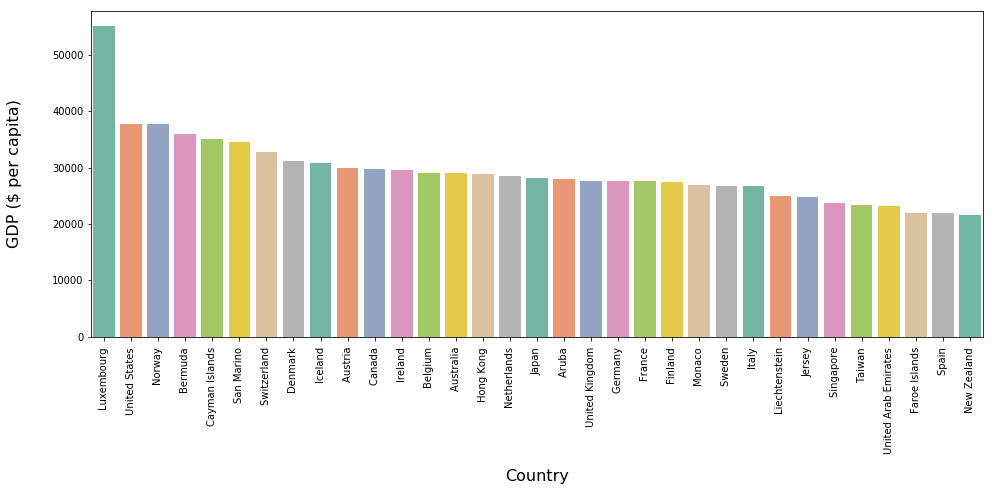

In [73]:
fig, ax = plt.subplots(figsize=(16,6))
sns.barplot(x='Country', y='GDP ($ per capita)', data=top_gdp_countries.head(33), palette='Set2')
ax.set_xlabel(ax.get_xlabel(), labelpad=15)
ax.set_ylabel(ax.get_ylabel(), labelpad=30)
ax.xaxis.label.set_fontsize(16)
ax.yaxis.label.set_fontsize(16)
plt.xticks(rotation=90)
plt.show()

The gist of the above bar graph is: 

labelpad - It is the distance between the label and its attributes.

It is plotting the first 30 sorted GDP countries having "Country" on x-axis having (labelpad=15 and font size= 16)
and "GDP" on y-axis having (labelpad=30 and font size= 16 and attributes(10000-50000) as per the first 30 GDP countries) with color palette as Set 2.

plt.xticks(rotation=90) is plottong the names of the countries in the rotation of 90 degree.

plt.show() will display the graph.
    

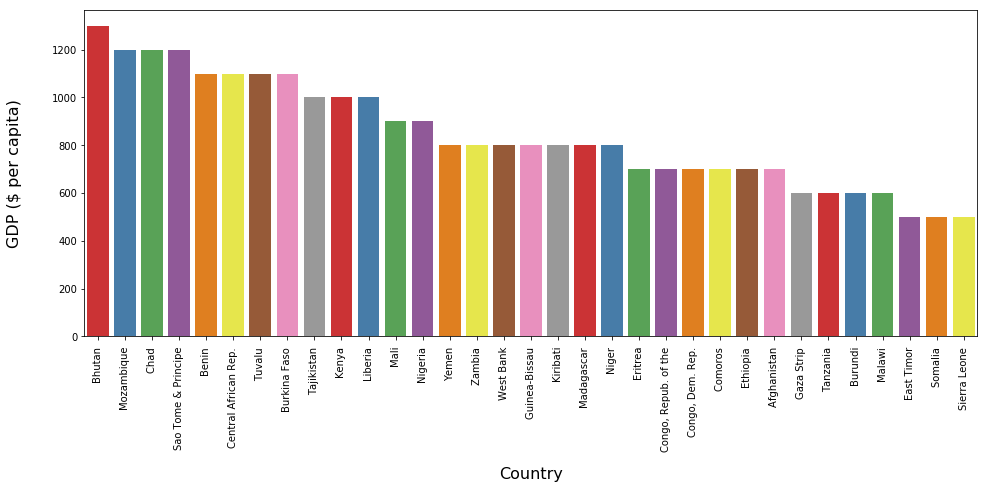

In [74]:
fig, ax = plt.subplots(figsize=(16,6))
sns.barplot(x='Country', y='GDP ($ per capita)', data=top_gdp_countries.tail(33), palette='Set1')
ax.set_xlabel(ax.get_xlabel(), labelpad=15)
ax.set_ylabel(ax.get_ylabel(), labelpad=30)
ax.xaxis.label.set_fontsize(16)
ax.yaxis.label.set_fontsize(16)
plt.xticks(rotation=90)
plt.show()

The gist of the above bar graph is:

labelpad - It is the distance between the label and its attributes.

It is plotting the last(tail) 33 sorted GDP countries having "Country" on x-axis having (labelpad=15 and font size= 16) and "GDP" on y-axis having (labelpad=30 and font size= 16 and attributes(0-1200) as per the last 33 GDP countries) with color palette as Set 1.
plt.xticks(rotation=90) is plottong the names of the countries in the rotation of 90 degree.

plt.xticks(rotation=90) is plottong the names of the countries in the rotation of 90 degree.

plt.show() will display the graph.

In [75]:
total = df.isnull().sum()[df.isnull().sum() != 0].sort_values(ascending = False)
percent = pd.Series(round(total/len(df)*100,2))
pd.concat([total, percent], axis=1, keys=['total_missing', 'percent'])

,total_missing,percent


The above output is based on the total and percent calculated with the above provided code.

total = calculated by checking the number of nulls if exists and then the sum of all the non zero values excluding 
the nulls and then sorting them in the descending order.

percent = calculated by the total divided by the number of rows * 100 which is then rounded to 2 decimels place. 

By concatinating total as total-missing and percent as percent with axis = 1 (displaying the result in column order).


In [76]:
# Checking for null values
df.isnull().values.any() 

False

In [77]:
df.isnull().sum()

Country                               0
Region                                0
Population                            0
Area (sq. mi.)                        0
Pop. Density (per sq. mi.)            0
Coastline (coast/area ratio)          0
Net migration                         0
Infant mortality (per 1000 births)    0
GDP ($ per capita)                    0
Literacy (%)                          0
Phones (per 1000)                     0
Arable (%)                            0
Crops (%)                             0
Other (%)                             0
Climate                               0
Birthrate                             0
Deathrate                             0
Agriculture                           0
Industry                              0
Service                               0
dtype: int64

The above output is displaying the number of null values of all the fields.

In [78]:
df.isnull().sum().sum()

0

The above is calculating the sum of all the total of nulls calculated in the above output.

# Regions

In [79]:
df.groupby('Region')[['GDP ($ per capita)', 'Literacy (%)', 'Agriculture']].median()

,GDP ($ per capita),Literacy (%),Agriculture
Region,,,
ASIA (EX. NEAR EAST),3450.0,90.60,0.1610
BALTICS,11400.0,99.80,0.0400
C.W. OF IND. STATES,3450.0,99.05,0.1980
EASTERN EUROPE,9100.0,98.45,0.0815
LATIN AMER. & CARIB,6300.0,94.00,0.0700
NEAR EAST,9250.0,85.00,0.0350
NORTHERN AFRICA,5775.0,72.10,0.1165
NORTHERN AMERICA,29800.0,97.00,0.0220
OCEANIA,5000.0,93.70,0.0990


In the above output we are calculating the median of the GDP,Literacy and Agriculture as per the same type of regions as we have grouped the region.

In [80]:
np.random.seed(sum(map(ord, "distributions")))

np.random.seed - It is random number generator.

ord - gives us the byte represenation of a character.

map - applies a function to every item of an interable

sum - sums up the elements of an iterable.
 
So, the above function will generate the random numbers by providing us the sum of all the iterable items with a byte  of a character.

In [81]:
df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997.0,647500.0,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655.0,28748.0,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091.0,2381740.0,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794.0,199.0,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,0.099,0.272,0.571
4,Andorra,WESTERN EUROPE,71201.0,468.0,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,0.099,0.272,0.571


The above is providing us the first 5 records.

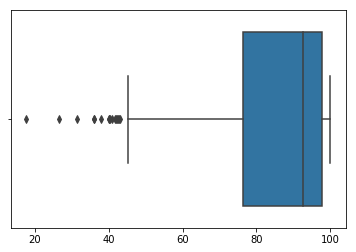

In [82]:
sns.boxplot(np.array(df['Literacy (%)']))

sns.boxplot - It will draw a box plot to show distributions with respect to the Literacy.

np.array - It will return an array as per the data frame Literacy.

The above boxplot is created by taking the array of the DataFrame Literacy (%).The Literacy percentage is displayed between its Minimum (33) and Maximum (100) having Median (93). 


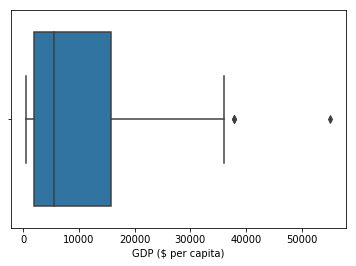

In [83]:
sns.boxplot(df['GDP ($ per capita)'])

sns.boxplot - It will draw a box plot to show distributions with respect to the GDP ($ per capita).

The above boxplot is created by taking the array of the DataFrame GDP. The GDP ($ per capita) is displayed between its Minimum (0) and Maximum (37000) having Median (8000).

In [84]:
df.corr()

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
Population,1.000000,0.469985,-0.028190,-0.068199,0.000036,0.024298,-0.038864,-0.052456,-0.029663,0.188704,-0.059782,-0.121084,-0.024411,-0.044189,-0.027215,0.006249,0.100471,-0.081254
Area (sq. mi.),0.469985,1.000000,-0.066917,-0.095627,0.047472,-0.005594,0.072491,0.025232,0.054703,-0.078881,-0.142477,0.138118,-0.091789,-0.065285,0.041447,-0.044291,0.122299,-0.054677
Pop. Density (per sq. mi.),-0.028190,-0.066917,1.000000,0.241690,0.178011,-0.142953,0.196093,0.101518,0.280802,-0.081404,-0.032330,0.082237,-0.001699,-0.158282,-0.069021,-0.106589,-0.109147,0.189446
Coastline (coast/area ratio),-0.068199,-0.095627,0.241690,1.000000,-0.134051,-0.137171,0.049614,0.127766,0.152497,-0.121735,0.339312,-0.078279,-0.033284,-0.075378,-0.161813,-0.043559,-0.189342,0.183868
Net migration,0.000036,0.047472,0.178011,-0.134051,1.000000,-0.024945,0.381877,-0.005668,0.239220,-0.060119,-0.344059,0.225192,-0.020845,-0.066087,0.033964,-0.108935,-0.025006,0.114301
Infant mortality (per 1000 births),0.024298,-0.005594,-0.142953,-0.137171,-0.024945,1.000000,-0.596424,-0.756088,-0.666106,-0.110154,-0.066185,0.123398,-0.333355,0.845636,0.656874,0.707926,0.009511,-0.619634
GDP ($ per capita),-0.038864,0.072491,0.196093,0.049614,0.381877,-0.596424,1.000000,0.495909,0.830903,0.021194,-0.217685,0.095431,0.295621,-0.645865,-0.198155,-0.572473,-0.029482,0.532418
Literacy (%),-0.052456,0.025232,0.101518,0.127766,-0.005668,-0.756088,0.495909,1.000000,0.565414,0.085631,0.044724,-0.093081,0.359711,-0.754837,-0.394168,-0.597133,0.040135,0.481603
Phones (per 1000),-0.029663,0.054703,0.280802,0.152497,0.239220,-0.666106,0.830903,0.565414,1.000000,0.059448,-0.150963,0.028768,0.345543,-0.719766,-0.257397,-0.581195,-0.143477,0.626184
Arable (%),0.188704,-0.078881,-0.081404,-0.121735,-0.060119,-0.110154,0.021194,0.085631,0.059448,1.000000,0.095226,-0.856845,0.346590,-0.183561,0.053051,-0.021570,-0.057425,0.085316


df.corr() = It computes the pairwise correlation of columns, excluding NA/null values.

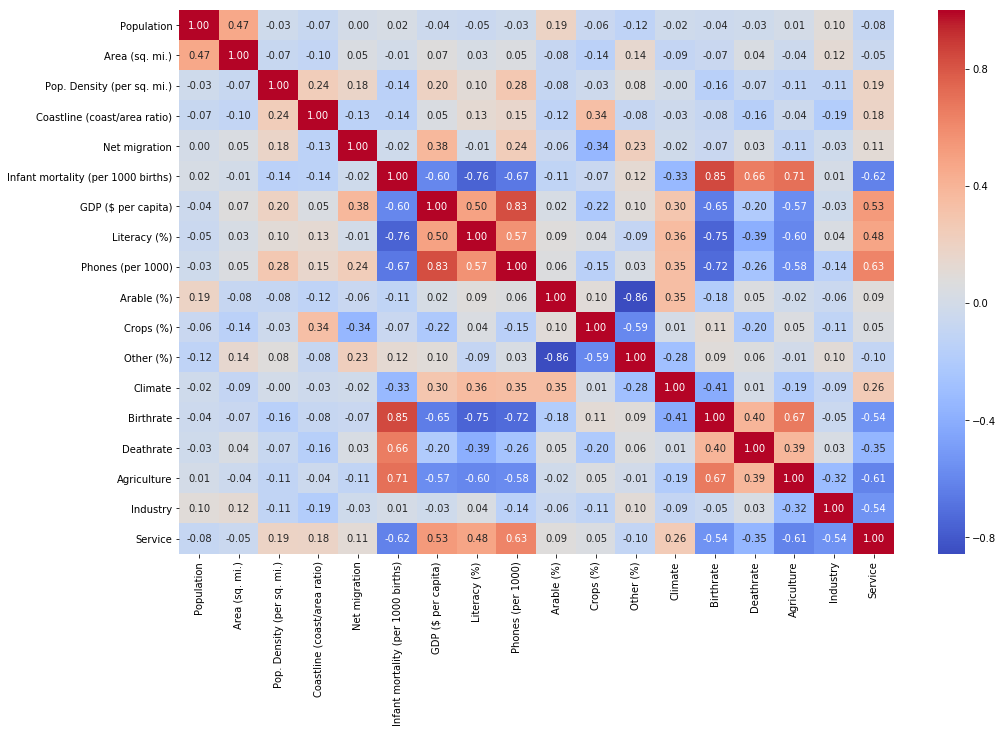

In [85]:
plt.figure(figsize=(16,10))
sns.heatmap(data=df.iloc[:,2:].corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

iloc - gets rows or columns at particular positions in the index so that it only takes integers.

annot - give us the values of the data if it is true.

cmap - map the data vales to the color map.

fmt - give us the string formatting code.

The above heatmap is plotted as per the correlation of the columns by displaying the data values corresponding to the columns as annot is True and formatting it to 2 decimal place as fmt is .2f provided the cmap as coolwarm.

'literacy','phones_per_1000','infant_mortality_per_1000_births','birthrate','deathrate' have higest absolute value correlation with 'gdp_$_per_capita'

In [86]:
# choose attributes which shows relation
x = df[['GDP ($ per capita)','Literacy (%)','Phones (per 1000)','Service','Infant mortality (per 1000 births)','Birthrate','Deathrate']]

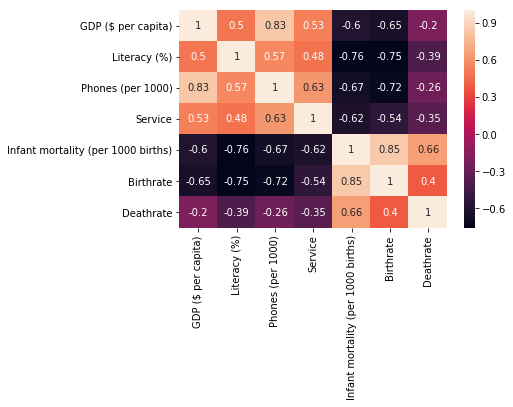

In [87]:
# show corr of the same
sns.heatmap(x.corr(), annot=True)

The above heatmap is plaotted as the correlation of the above mentioned columns and diplaying the data values in the map as the annot is True.Death Rate have the highest absolute value correlation with GDP($ per capita).

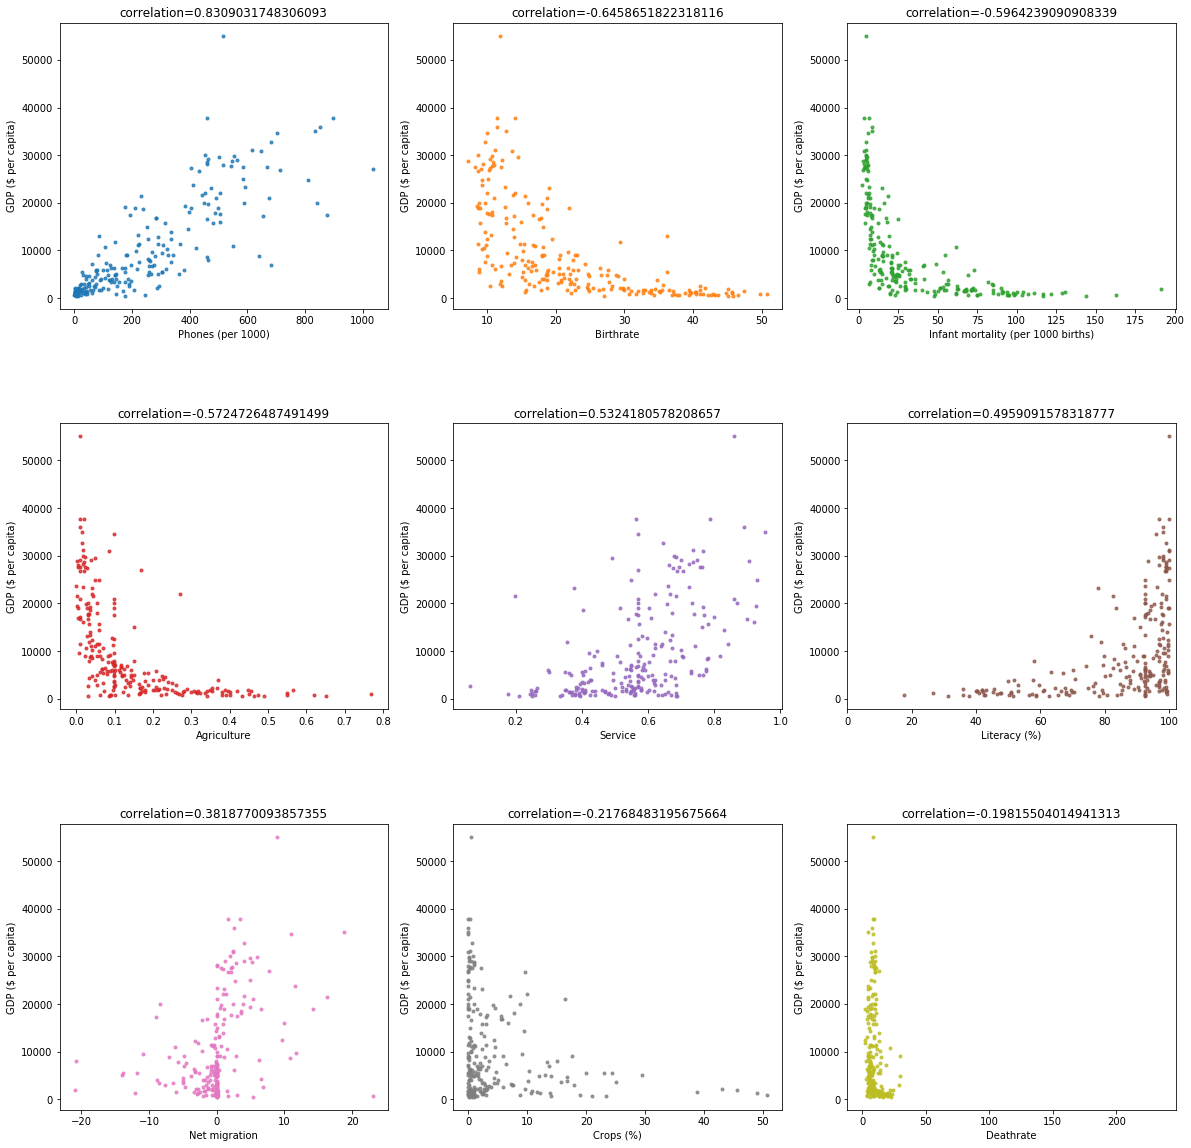

In [88]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20,20))
plt.subplots_adjust(hspace=0.4)

corr_to_gdp = pd.Series() 
for col in df.columns.values[2:]:
    if ((col!='GDP ($ per capita)')&(col!='Climate')):
        corr_to_gdp[col] = df['GDP ($ per capita)'].corr(df[col])
abs_corr_to_gdp = corr_to_gdp.abs().sort_values(ascending=False)
corr_to_gdp = corr_to_gdp.loc[abs_corr_to_gdp.index]

for i in range(3):
    for j in range(3):
        sns.regplot(x=corr_to_gdp.index.values[i*3+j], y='GDP ($ per capita)', data=df,
                   ax=axes[i,j], fit_reg=False, marker='.')
        title = 'correlation='+str(corr_to_gdp[i*3+j])
        axes[i,j].set_title(title)
axes[1,2].set_xlim(0,102)
plt.show()

It is having 1 dependent variable(Y) - GDP($ per capita) and 9 independent variables(x)- Phones (per 1000), Birthrate, Infant mortaality(per 1000 births),Agriculture, Service,Literacy,Net migration,Crops,Deathrate.

The above regplots are axes level function and the subplots are plotted as a fixed y axis - GDP($ per capita) and changing x-axis with the correalted columns sorted in ascending order. i.e. correaltion is done to gdp.It is plotting all the 9 subplots after 0.4 space within the subplots.It is calculating absolute correaltion to gdp and correaltion to gdp and is ploting the graphs with different colors..

marker (.) states that the graphs are plotted with this mark.

In [89]:
df.groupby('Region')[['GDP ($ per capita)', 'Phones (per 1000)', 'Service']].median()

,GDP ($ per capita),Phones (per 1000),Service
Region,,,
ASIA (EX. NEAR EAST),3450.0,75.75,0.4950
BALTICS,11400.0,321.40,0.6660
C.W. OF IND. STATES,3450.0,155.35,0.4595
EASTERN EUROPE,9100.0,296.05,0.5910
LATIN AMER. & CARIB,6300.0,220.40,0.6150
NEAR EAST,9250.0,193.60,0.5840
NORTHERN AFRICA,5775.0,125.35,0.4255
NORTHERN AMERICA,29800.0,683.20,0.6840
OCEANIA,5000.0,118.60,0.5710


 In the above output the medians of GDP,Phones and Service are calculated as per the region as regions are grouped.

In [90]:
# choose attributes which shows relation
x = df[['GDP ($ per capita)','Phones (per 1000)','Service']]

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/anaconda3/lib/python3.7/site-packages/numpy/co

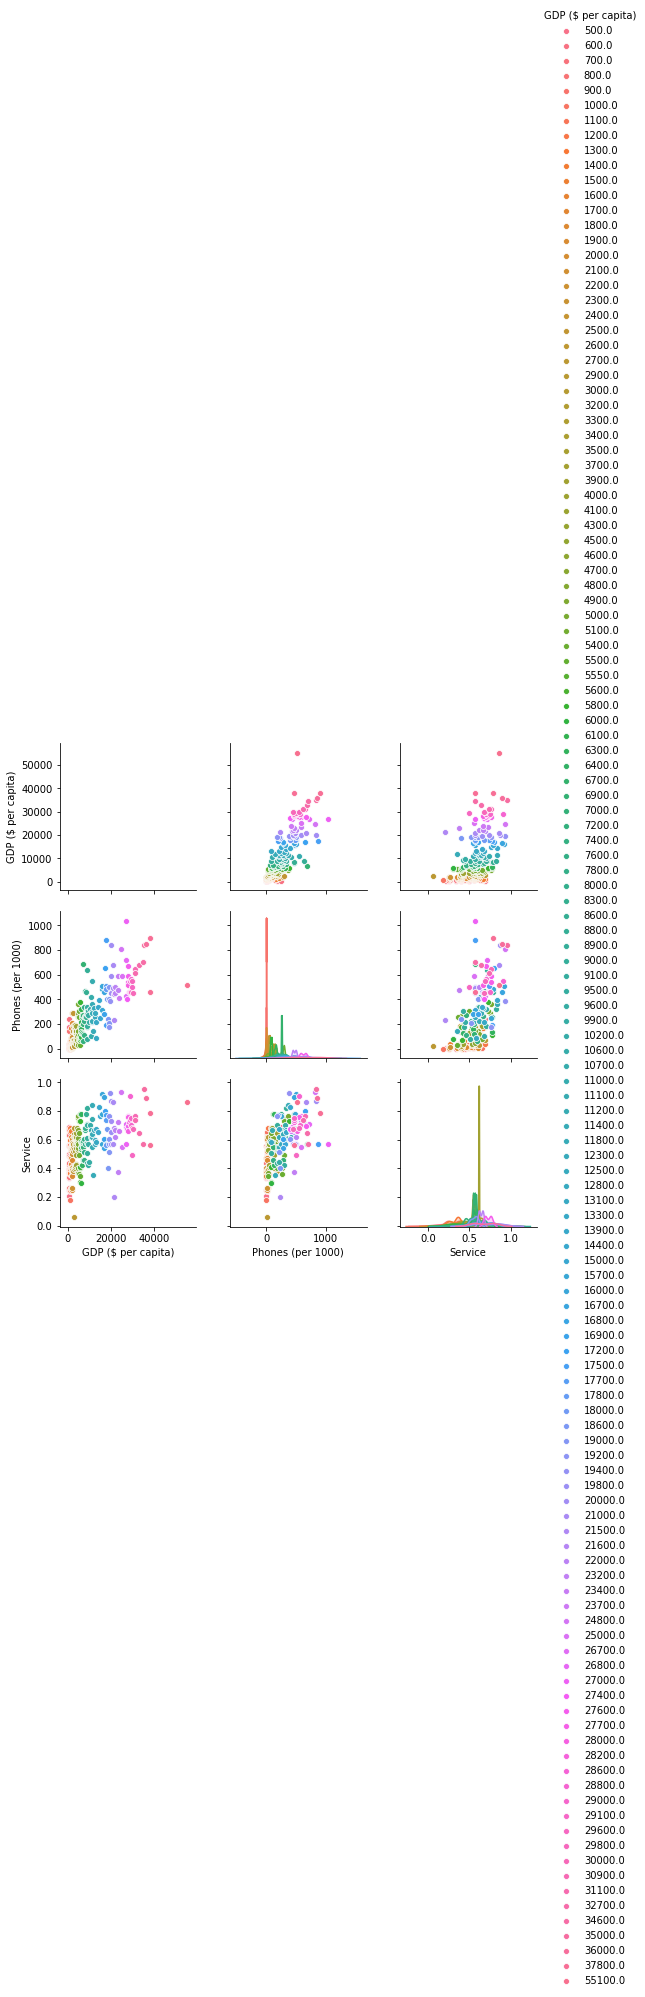

In [91]:
sns.pairplot(x, hue="GDP ($ per capita)")

hue = "GDP($ per capita)" means that the variables in data to map plot aspects to different colors.

On the right side GDP($ per capita) are generated and printed with different set of colors and graphs will be scatterplotted as per the three attributes mentioned above with respect to hue as GPD.

First graph is GDP plotted with GDP.

Second graph is GDP plotted with Phones.

Third graph is GDP plotted with Service.


In [92]:
x.corr()

,GDP ($ per capita),Phones (per 1000),Service
GDP ($ per capita),1.000000,0.830903,0.532418
Phones (per 1000),0.830903,1.000000,0.626184
Service,0.532418,0.626184,1.000000


The above output is providing us with the correaltions of the columns for all the attributes of x(GDP,Phones,Servoce).

In [93]:
df['GDP ($ per capita)']

0        700.0
1       4500.0
2       6000.0
3       8000.0
4      19000.0
5       1900.0
6       8600.0
7      11000.0
8      11200.0
9       3500.0
10     28000.0
11     29000.0
12     30000.0
13      3400.0
14     16700.0
15     16900.0
16      1900.0
17     15700.0
18      6100.0
19     29100.0
20      4900.0
21      1100.0
22     36000.0
23      1300.0
24      2400.0
25      6100.0
26      9000.0
27      7600.0
28     16000.0
29     18600.0
        ...   
197     3300.0
198    23400.0
199     1000.0
200      600.0
201     7400.0
202     1500.0
203     2200.0
204     9500.0
205     6900.0
206     6700.0
207     5800.0
208     9600.0
209     1100.0
210     1400.0
211     5400.0
212    23200.0
213    27700.0
214    37800.0
215    12800.0
216     1700.0
217     2900.0
218     4800.0
219     2500.0
220    17200.0
221     3700.0
222      800.0
223     5550.0
224      800.0
225      800.0
226     1900.0
Name: GDP ($ per capita), Length: 227, dtype: float64

The above output is displaying all the values of GDP ($ per capita).

In [94]:
gdp_no_nan= df['GDP ($ per capita)'][~np.isnan(df['GDP ($ per capita)'])]

The above will provide us with the value of gdp_no_man as data value of GDP multiplied by the negation of the boolean result of the GDP .

np.isnan - will test element-wise for NaN and return result as a boolean array.

In [95]:
gdp_no_nan

0        700.0
1       4500.0
2       6000.0
3       8000.0
4      19000.0
5       1900.0
6       8600.0
7      11000.0
8      11200.0
9       3500.0
10     28000.0
11     29000.0
12     30000.0
13      3400.0
14     16700.0
15     16900.0
16      1900.0
17     15700.0
18      6100.0
19     29100.0
20      4900.0
21      1100.0
22     36000.0
23      1300.0
24      2400.0
25      6100.0
26      9000.0
27      7600.0
28     16000.0
29     18600.0
        ...   
197     3300.0
198    23400.0
199     1000.0
200      600.0
201     7400.0
202     1500.0
203     2200.0
204     9500.0
205     6900.0
206     6700.0
207     5800.0
208     9600.0
209     1100.0
210     1400.0
211     5400.0
212    23200.0
213    27700.0
214    37800.0
215    12800.0
216     1700.0
217     2900.0
218     4800.0
219     2500.0
220    17200.0
221     3700.0
222      800.0
223     5550.0
224      800.0
225      800.0
226     1900.0
Name: GDP ($ per capita), Length: 227, dtype: float64

The above output is displaying all the values of gdp_no_man calculated above.

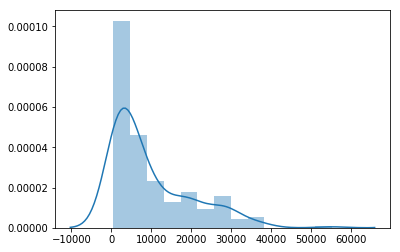

In [96]:
#checking distribution of literacy of the world
sns.distplot(np.array(gdp_no_nan))

The above dist plot is as per the array of gdp_no_man as the line plotted is having the lowest lowest value is -10000 and the highest is towards 6000.On the x-axis there is GDP ($ per capita) and on the y-axis is the Literacy. The graph is checking the distribution of literacy of the world.The highest peak in the graph is at x-axis = 0 and y-axis near to 0.000006.

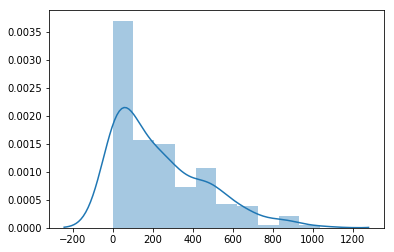

In [97]:
#checking distribution of literacy of the world
sns.distplot(np.array(df['Phones (per 1000)']))

The above dist plot is as per the array of Phones(per 1000) as the line plotted is having the lowest lowest value is -200 and the highest is 1200.On the x-axis there is GDP ($ per capita) and on the y-axis is the Literacy. The graph is checking the distribution of literacy of the world.The highest peak in the graph is at x-axis = 0 and y-axis near to 0.0021.

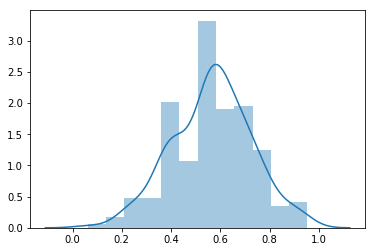

In [98]:
sns.distplot(np.array(df['Service']))

The above dist plot is as per the array of Service as the line plotted is having the lowest value is 0.0 and the highest is 1.0.On the x-axis there is GDP ($ per capita) and on the y-axis is the Literacy. The graph is checking the distribution of literacy of the world.The highest peak in the graph is at x-axis near to 0.6 and y-axis near to 2.5

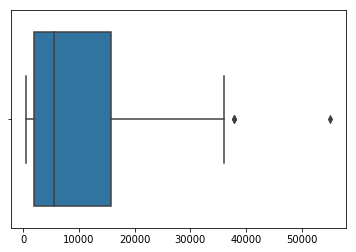

In [99]:
sns.boxplot(np.array(df['GDP ($ per capita)']))

sns.boxplot - It will draw a box plot to show distributions with respect to the GDP ($ per capita).

np.array - It will return an array as per the data frame GDP ($ per capita).

The above boxplot is created by taking the array of the DataFrame GDP ($ per capita).The GDP is displayed between its Minimum (0) and Maximum (37000) having Median (5000).

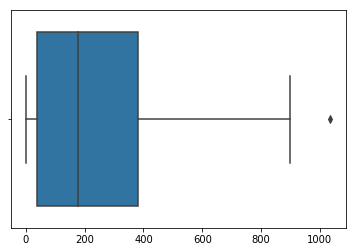

In [100]:
sns.boxplot(np.array(df['Phones (per 1000)']))

sns.boxplot - It will draw a box plot to show distributions with respect to the Phones (per 1000).

np.array - It will return an array as per the data frame Phones (per 1000).

The above boxplot is created by taking the array of the DataFrame Phones (per 1000).The Phones is displayed between its Minimum (0) and Maximum (900) having Median (198).

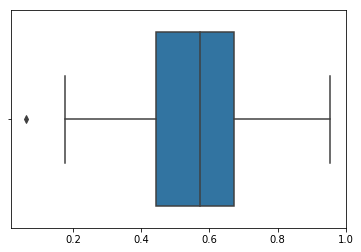

In [101]:
sns.boxplot(np.array(df['Service']))

sns.boxplot - It will draw a box plot to show distributions with respect to the Service.

np.array - It will return an array as per the data frame Service.

The above boxplot is created by taking the array of the DataFrame Service.The Service is displayed between its Minimum (0.05) and Maximum (0.98) having Median (0.6).

## Conclusion

I would like to summarize that I learned the fundamental concepts of machine learning from this assignment that are applicable in real life models. Those concepts helped me to visualize the data before applying any machine learning algorithm on it and helped me to understand the relation between the attributes in dataset. By visualizing different plots like barplot, distplot I get to know the different plotting libraries like Seaborn, Matplotlib, which helped us to understand our data in more subtle way. 
This assignment also helped me to understand the data preprocessing part which is equally important as implementing the algorithm part. In this part I learned about different methods which helped me in understanding more about the attributes of our data. And another important library I learned was impute in sklearn. Its SimpleImputer helped in dealing with the missing values in our dataset in some ways.                                                                
#### Hypothesis:
There are many predictors in dataset that could contribute in predicting GDP. But according me, Services, Literacy, population could be predictors for predicting the GDP per capita. My thought was that with the increase in Services and Literacy rate, there would be increase in GDP per capita as well. And with decrease in the population, GDP per capita might get increase. 

#### Findings: 
After visualizing the different plots for the data, I observed that the hypothesis I made was true. We can analyze through the Heat Map, subplot that the predictors such as Literacy, Services has good correlation (>0.5) with the GDP ($ per capita), which means with the increase in these 2 factors, there is significant chance of increasing the GDP. We can observe from subplot of Literacy rate with GDP that Countries with Literacy rate near to 100 percent has very high chance of more GDP per capita. While on the other hand, Population is having a negative correlation (-0.04) with the GDP that means GDP might get decrease with the increase in population.

But I have also found that apart from above predictors, there are some other attributes which can affect the GDP. We can observe from subplot that as the number of Phones increases, there was increase in GDP per capita. And this trend can also be observed from the correlation value between Phone and GDP (>.80). And some negative trends can be seen with attributes like Infant Mortality Rate and Birth Rate. For countries having birth rate between 10 and 20 the GDP per capita is more. Similarly, countries with Infant Mortality Rate less than 25 per 1000 has high value of GDP per capita.


## Contributions 


I completed my assignment independently and I encountered 5 errors in the code out of 35 inputs.The errors were in the distplot,boxplot,pairplot,heatmaps and i described all the functions with their uses and explained them.
They all were facing the common issue. 

There were null values in the code and due to which the graphs were not getting plotted.So, there are two ways to deal with this code:                                        
1: Remove all the null values if it is not making a significant change.                                               
2: Replace all the null values with the mean,median of the appropriate column so it will plot the graph.

Below is the code added in the assignment:

imputer = SimpleImputer(missing_values=np.nan, strategy="median")                                                     
imputer = imputer.fit(df.iloc[:,2:])                                                           
df.iloc[:,2:] = imputer.transform(df.iloc[:,2:])

#df.head()


So,I contributed

By Own: 40%                                                                                                           
By External source: 20%                                                                                               
Provided  by the professor : 40%


##  Citations


https://pandas.pydata.org/pandas-docs/stable/reference/

https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/

https://seaborn.pydata.org/api.html

https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing

https://scikit-learn.org/stable/modules/impute.html

##  License

Must have a license such as the MIT License [https://opensource.org/licenses/MIT]( https://opensource.org/licenses/MIT)

Copyright 2019 Newzy Sharma 

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated 
documentation files (the "Software"), to deal in the Software without restriction, including without limitation the 
rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit
persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the 
Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE 
WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR 
COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR 
OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.